 # Projekt Big Data

W moim projekcie intepretuje dane o sprzedawanych samochodach w 2012r.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
%matplotlib inline  

In [3]:
r=pd.read_csv('CenyAut2012.csv', sep = ';')

In [4]:
r.describe().T


,count,mean,std,min,25%,50%,75%,max
Cena,210134.0,55385.514496,2.022163e+05,174.0,10900.0,21300.0,44900.0,25650000.0
CenawPLN,210134.0,35790.161991,7.047526e+04,400.0,10900.0,19900.0,37400.0,11111111.0
KM,181450.0,127.529628,9.359906e+01,1.0,90.0,115.0,140.0,21754.0
kW,181450.0,93.768234,6.884593e+01,1.0,66.0,85.0,103.0,16000.0
Pojemnoscskokowa,202500.0,1944.444879,7.820368e+02,10.0,1586.0,1896.0,2000.0,151000.0
Przebiegwkm,169171.0,146941.334123,3.467856e+06,1.0,85000.0,140000.0,180000.0,999999999.0
Rok.produkcji,210134.0,2003.378021,5.559794e+00,1900.0,2000.0,2004.0,2007.0,2012.0


Według tabelki opisującej dane o sprzedawanych samochodach najwięcej samochodów miało 140km\h i kosztowało 37400zł oaz większość samochodów wyprodukowano w 2007r.

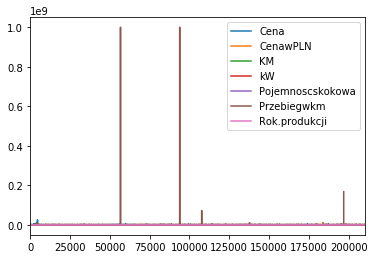

In [5]:
r.plot()

Na wykresie mamy zbiór istotnych danych o sprzedawanych samochodach jak widać jest bardzo równy pod względem więkoszościcech aut jedynie przebieg w km są widzoczne skoki.

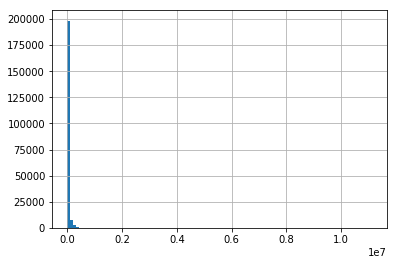

In [6]:
r.CenawPLN.hist(bins=100)

Na histgoramie cen w zł widać że wszystkie samochody są z wysokiej półki i bardzo drogie i co za tym idzie ekskluzywne.


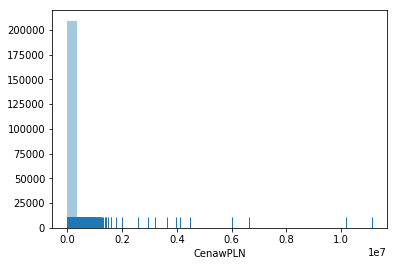

In [7]:
sns.distplot(r.CenawPLN, bins=30, kde=False, rug=True)

Na histgoramie z obserwacjami cen w zł widać jak bardzo są różne ceny samochodów z wyższej półki co do obserwacji z początku są mocno zbite później się rozrzedzają.

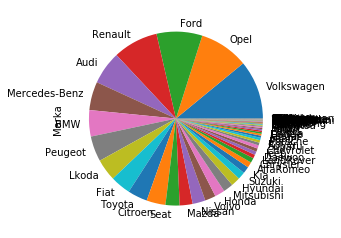

In [8]:
r.Marka.value_counts().plot.pie()

Na wykresie kołowym marek samochodów widać jak jest różnodrodna ilość marek. Najbardziej przeważa Volkswagen, opel, ford i Renault a reszty marek jest mało a niektórych nawet o 1/4 mniej od tych co jest najwięcej.

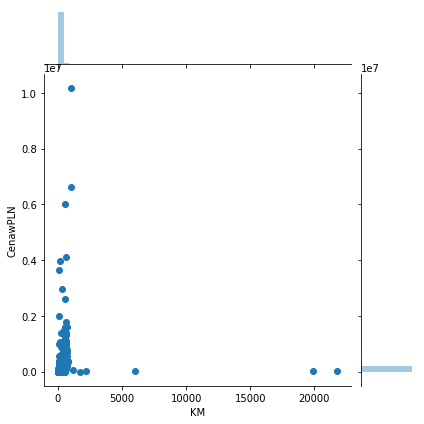

In [9]:
sns.jointplot(x = r["KM"], y = r["CenawPLN"])

Powyża wizualizacja zależności pomiędzy KM a Ceną w zł pokazuje że im większa cena tym samochód może przejechąć więcej km/h.

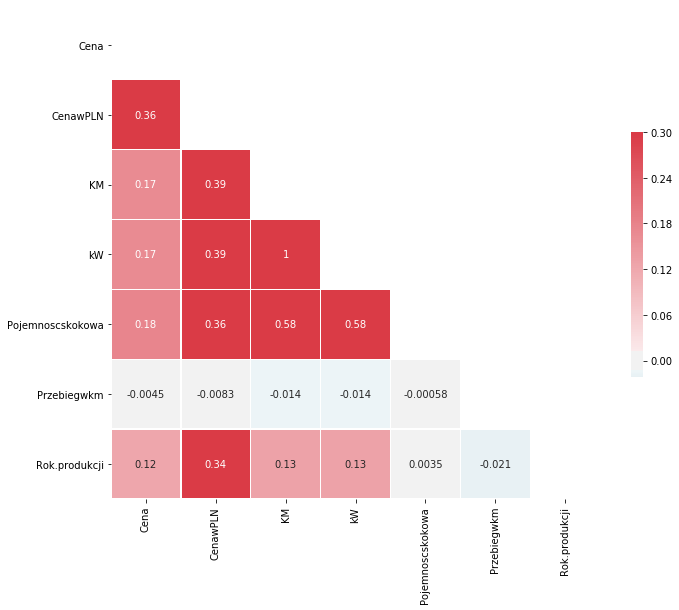

In [10]:
corr = r.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Na korelacji na heatmapie widać że pozostałe elementy danych najbradziej korelują z Ceną w zł.